In [121]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [122]:
df = pd.read_table("doughs.dat", sep="\s+", usecols=['id','PressureLoad','DefVol','Bacteria','Yeast','pH','TTA','Restaurant'])
df = df.drop('id',axis = 1)
X = df.drop('Restaurant', axis=1).to_numpy()
y = df['Restaurant'].to_numpy()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


# part a

In [53]:
def compute_Z(X, centering=True, scaling=True):
    # copying X because need a float type
    Z = X.astype(float)

    # shapes
    rows = Z.shape[0]
    cols = Z.shape[1]

    if centering:
        # means calculation for centering
        means = X.mean(0)
        for i in range(rows):
            for j in range(cols):
                Z[i, j] = Z[i, j] - means[j]

    # scaling with std dev
    if scaling:
        std = np.std(Z, axis=0)
        for i in range(cols):
            for j in range(rows):
                Z[j][i] = Z[j][i] / std[i]  # standardize every feature

    return Z


def compute_covariance_matrix(Z):
    return Z.T.dot(Z)


def find_pcs(COV):
    eigenValues, eigenVectors = LA.eig(COV)
    idx = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]

    return eigenValues, eigenVectors


def project_data(Z, PCS, L, k, var):
    eigen_pairs = [(np.abs(L[i]), PCS[:, i]) for i in range(len(L))]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)

    # copy of components could be useful
    component_matrix = np.copy(PCS)
    if k != 0:
        # delete unnecessary components
        component_matrix = np.delete(component_matrix, range(k, component_matrix.shape[1]), axis=1)
        Z_star = Z.dot(component_matrix)
    else:
        print()
        tot_var = 0
        eigen_val_index = 0
        while tot_var < var:
            tot_var = tot_var + L[eigen_val_index] / np.sum(L)
            eigen_val_index = eigen_val_index + 1
        component_count = eigen_val_index
        component_matrix = np.delete(component_matrix, range(component_count, component_matrix.shape[1]), axis=1)
        Z_star = Z.dot(component_matrix)
    return Z_star


In [67]:
Z = compute_Z(X, centering=True, scaling=False)
cov = compute_covariance_matrix(Z)
eigenValues, eigenVectors = find_pcs(cov)

In [68]:
eigenValues

array([4.22284393e+03, 1.54252434e+03, 2.65875883e+01, 8.12218533e+00,
       1.39520298e+00, 3.00227145e-01])

In [69]:
sum(eigenValues[0:2])/sum(eigenValues)

0.9937251594068908

# test of normality of data (part b)

In [84]:
from scipy import stats

def shapiro_test(X):
    shapiro_test = stats.shapiro(X)
    statistic,pvalue = shapiro_test 
    if pvalue<0.05:
        print('null hypothesis that the data are normally distributed is rejected')
    else:
        print('data is normal')


In [85]:
for i in range(1,7):
    Z_star = project_data(Z,eigenVectors, eigenValues, i, 0)
    print("number of component is : {} ".format(i))
    shapiro_test(Z_star)

number of component is : 1 
data is normal
number of component is : 2 
data is normal
number of component is : 3 
null hypothesis that the data are normally distributed is rejected
number of component is : 4 
null hypothesis that the data are normally distributed is rejected
number of component is : 5 
null hypothesis that the data are normally distributed is rejected
number of component is : 6 
null hypothesis that the data are normally distributed is rejected


# part C

In [123]:
Z_star = project_data(Z,eigenVectors, eigenValues, 3, 0)
y = np.where(y==1 , y, 2)

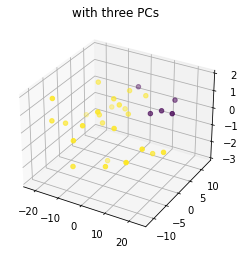

In [124]:
fig = plt.figure()
ax = plt.axes(projection="3d")
plt.title('with three PCs')
x_points = Z_star[:,0]
y_points = Z_star[:,1]
z_points= Z_star[:,2]
ax.scatter3D(x_points, y_points, z_points, c=y)
plt.show()

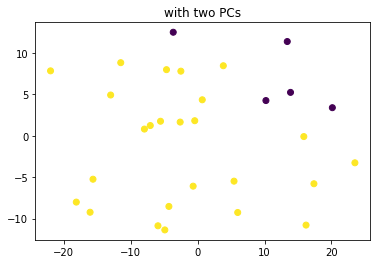

In [125]:
Z_star = project_data(Z,eigenVectors, eigenValues, 2, 0)
fig = plt.figure()
ax = plt.axes()

x_points = Z_star[:,0]
y_points = Z_star[:,1]
ax.scatter(x_points, y_points,c=y)
plt.title('with two PCs')
plt.show()